
# Machine Learning Project - Ames Housing Data

Ames, Iowa is the college town of **Iowa State University**. The Ames housing dataset consists of about $2500$ house sale records between $2006-2010$. Detailed information about the house attributes, along with the sale prices, is recorded in the dataset. The goal of the project is to:
- perform descriptive data analysis to gain business (i.e. housing market) insights
- build descriptive machine learning models to understand the local housing market.
- build predictive machine learning models for the local house price prediction.

A subset of the **Ames** dataset is hosted on [**Kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) as an entry-level regression competition. You may visit their site for some information on the meanings of its data columns (the data dictionary). In this notebook, we will describe various project ideas related to this data.

## Who We You Are

- We are a data scientist for an online real estate database company which provides house price estimation (like **Zillow** home price estimates) for the site visitors.



## Importaing all libraries

In [150]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline 



## Reading the data 

In [151]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [152]:
Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
Realestate.shape

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_91383/2318822397.py:1: DtypeWarning:

Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.



(22213, 90)

In [153]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [154]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [155]:
housing.columns.sort_values(ascending=True)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolArea', 'P

In [156]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [157]:
# Getting the numerical features out of the dataset

print(f"The total number of numerical features is :",  {len(housing.select_dtypes(exclude='object').columns)},"\n" ,
      housing.select_dtypes(exclude='object').columns)


The total number of numerical features is : {38} 
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


## Cleaning and Tuning the dataset

In [158]:
# dropping ID column

housing.drop(columns=['PID'], inplace=True)

In [159]:
# missing Values

# show only the count of columns with null values

columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 27


PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [160]:
# check correlation of missing values columns to price


corr_col = list(columns_NA.index)
corr_col.append('SalePrice')
housing[corr_col].corr()




,LotFrontage,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,TotalBsmtSF,BsmtUnfSF,GarageCars,GarageArea,BsmtFinSF2,BsmtFinSF1,SalePrice
LotFrontage,1.000000,0.051578,0.202139,-0.028832,0.106641,0.307885,0.104167,0.302285,0.337158,0.055247,0.177304,0.358577
GarageYrBlt,0.051578,1.000000,0.246120,-0.053576,0.174757,0.339679,0.133690,0.581007,0.554057,-0.046385,0.214492,0.520763
MasVnrArea,0.202139,0.246120,1.000000,0.002436,0.129113,0.361515,0.080283,0.348303,0.348993,-0.009519,0.277336,0.500964
BsmtHalfBath,-0.028832,-0.053576,0.002436,1.000000,-0.164064,0.000899,-0.108801,-0.029313,-0.018288,0.101400,0.067414,-0.033802
BsmtFullBath,0.106641,0.174757,0.129113,-0.164064,1.000000,0.330192,-0.383609,0.161022,0.183992,0.169453,0.632603,0.291080
TotalBsmtSF,0.307885,0.339679,0.361515,0.000899,0.330192,1.000000,0.421573,0.435333,0.465177,0.110119,0.512642,0.652222
BsmtUnfSF,0.104167,0.133690,0.080283,-0.108801,-0.383609,0.421573,1.000000,0.166081,0.149994,-0.242334,-0.480927,0.167519
GarageCars,0.302285,0.581007,0.348303,-0.029313,0.161022,0.435333,0.166081,1.000000,0.889603,-0.004548,0.261766,0.638801
GarageArea,0.337158,0.554057,0.348993,-0.018288,0.183992,0.465177,0.149994,0.889603,1.000000,0.016331,0.298309,0.634992
BsmtFinSF2,0.055247,-0.046385,-0.009519,0.101400,0.169453,0.110119,-0.242334,-0.004548,0.016331,1.000000,-0.058911,0.022520


In [161]:
# Delete Columns with Negative Correlations

#housing.drop(columns=['BsmtHalfBath'], inplace=True)



# Delete top 5 columns with missing values

#housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], inplace=True)

# Remove Columns with small correlation

#housing.drop(columns=['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','LotFrontage','GarageYrBlt'], inplace=True)

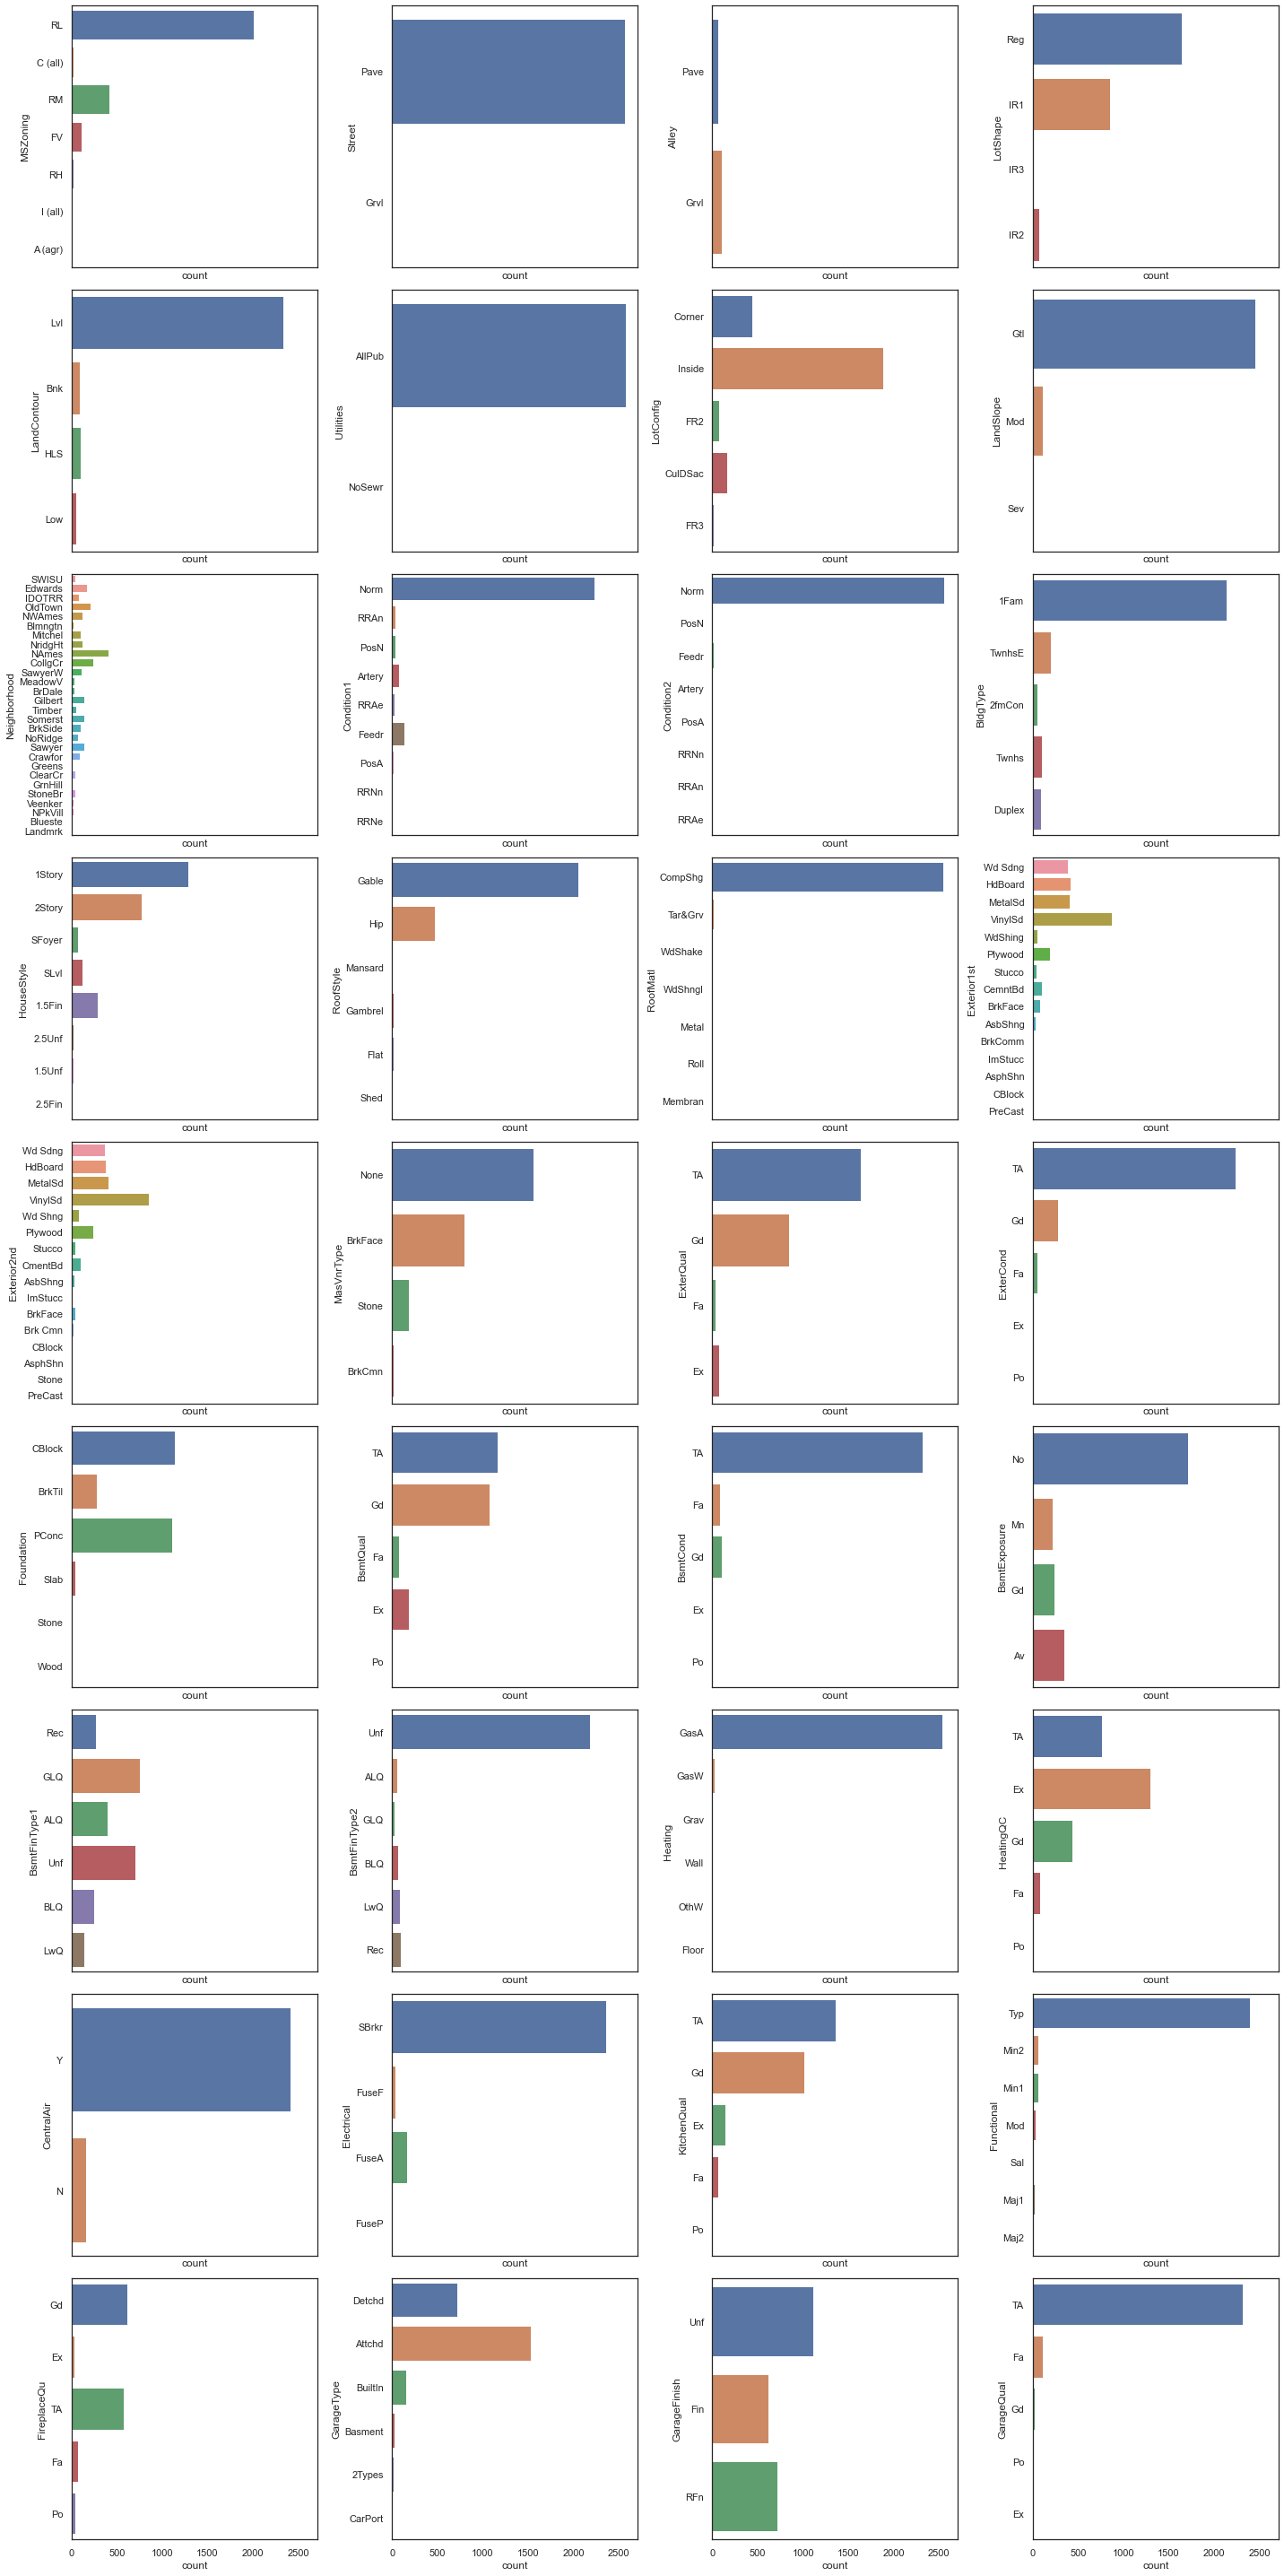

<Figure size 432x288 with 0 Axes>

In [162]:
# Plotting each categorical feature

fig, axes =plt.subplots(9,4, figsize=(20,40), sharex=True)
axes = axes.flatten()
object_bol = housing.dtypes == 'object'
for ax, catplot in zip(axes, housing.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=housing, ax=ax)

plt.tight_layout()  
plt.show()

plt.savefig('Categorical_features_all.png')

In [163]:
# Fill the rest of Null. Columns with best fill based on Discription File



housing['MasVnrType'].fillna('None', inplace=True)


for i in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1'
         ,'PoolQC','MiscFeature', 'Alley', 'Fence']:
    housing[i].fillna('NA', inplace=True)

# Replacing small number of null value with most common value in column

housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].value_counts().idxmax(), inplace=True)
housing['GarageCars'].fillna(housing['GarageCars'].value_counts().idxmax(), inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].value_counts().idxmax(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].value_counts().idxmax(), inplace=True)
housing['BsmtUnfSF'].fillna(housing['BsmtUnfSF'].value_counts().idxmax(), inplace=True)
housing['BsmtFinSF2'].fillna(housing['BsmtFinSF2'].value_counts().idxmax(), inplace=True)
housing['BsmtFinSF1'].fillna(housing['BsmtFinSF1'].value_counts().idxmax(), inplace=True)
housing['BsmtFullBath'].fillna(housing['BsmtFullBath'].value_counts().idxmax(), inplace=True)
housing['BsmtHalfBath'].fillna(housing['BsmtHalfBath'].value_counts().idxmax(), inplace=True)

# From the Data description File we see the following columns has the same values.
# Columns FireplaceQu ,BsmtQual,ExterQual ,ExterCond ,HeatingQC,BsmtCond ,GarageQual ,KitchenQual , GarageCond 
# they have the same values to decribe them :

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage


# so we replace the cahr values with numerical and NA with 0



housing['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['FireplaceQu'].fillna(0, inplace=True)

housing['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtQual'].fillna(0, inplace=True)

housing['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterQual'].fillna(0, inplace=True)

housing['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterCond'].fillna(0, inplace=True)

housing['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['HeatingQC'].fillna(0, inplace=True)

housing['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtCond'].fillna(0, inplace=True)

housing['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageQual'].fillna(0, inplace=True)

housing['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['KitchenQual'].fillna(0, inplace=True)

housing['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageCond'].fillna(0, inplace=True)


# Fill With mean values

housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)

# fill garage year built with house year built

housing['GarageYrBlt'].fillna(housing['YearBuilt'].mean(), inplace=True)


In [164]:
columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 0


Series([], dtype: int64)

In [165]:
print("New Data set shape is : ",housing.shape)
print("\n\n")


housing.info()




New Data set shape is :  (2580, 80)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2580 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          2580 non-null   object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle    

In [166]:
# Save new cleaned data

housing.to_csv('Housing_cleaned.csv')

In [167]:
housing.duplicated().sum()

1

In [168]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicateRows = housing[housing.duplicated()]
 
# Print the resultant Dataframe
duplicateRows

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,1717,194000,50,RL,80.0,12400,Pave,NA,Reg,HLS,...,113,0,NA,NA,NA,0,2,2006,WD,Normal


### Normality Check

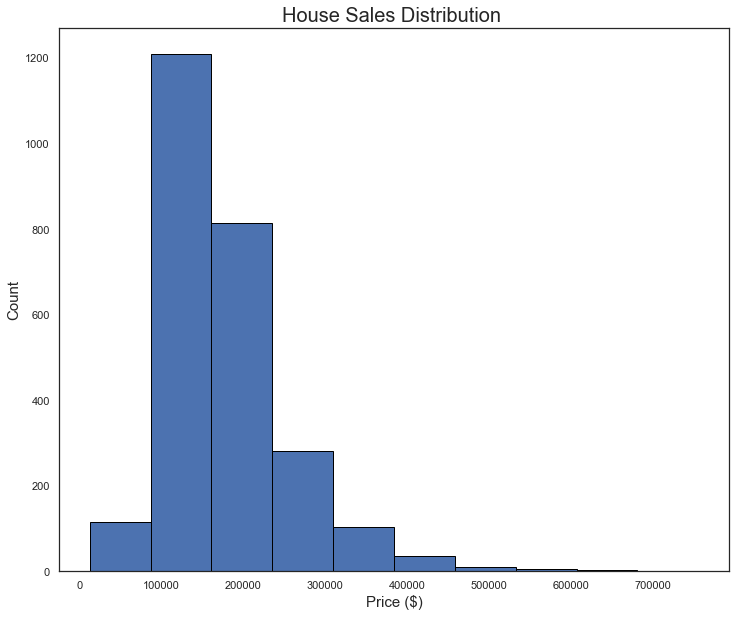

In [169]:
# plotting Sale prices distruntion 

plt.figure(figsize=(12, 10))
plt.hist(housing['SalePrice'],edgecolor='black')
plt.title("House Sales Distribution " , fontsize=20)

plt.ylabel("Count", fontsize=15)
plt.xlabel("Price ($)", fontsize=15)

plt.savefig('Price_norm.png')

#### We can see that housing prices are right skewed , so we apply either the natural logarithm function or the square root to fix the problem.

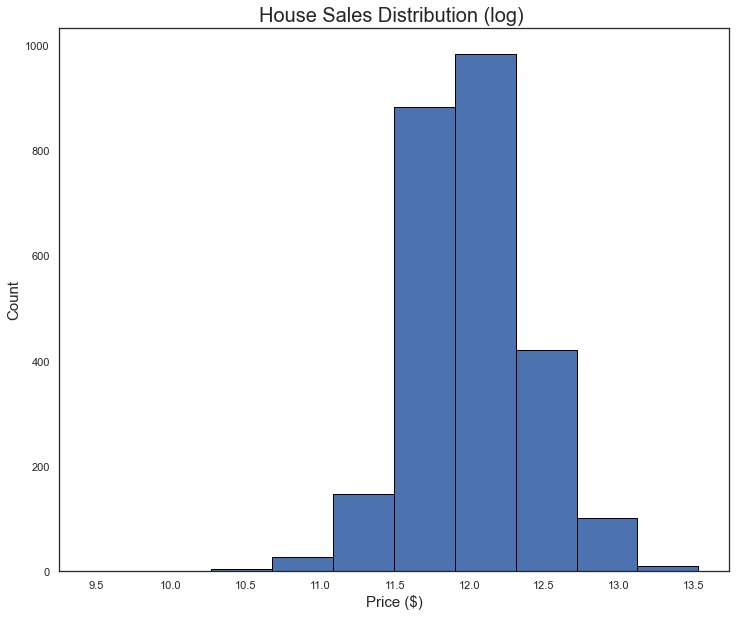

In [170]:
# Calculate natural logarithm on SalePrice

natural_log = np.log(housing['SalePrice'])


plt.figure(figsize=(12, 10))
plt.hist(natural_log,edgecolor='black')
plt.title("House Sales Distribution (log) " , fontsize=20)

plt.ylabel("Count", fontsize=15)
plt.xlabel("Price ($)", fontsize=15)

plt.savefig('Price_norm_log.png')

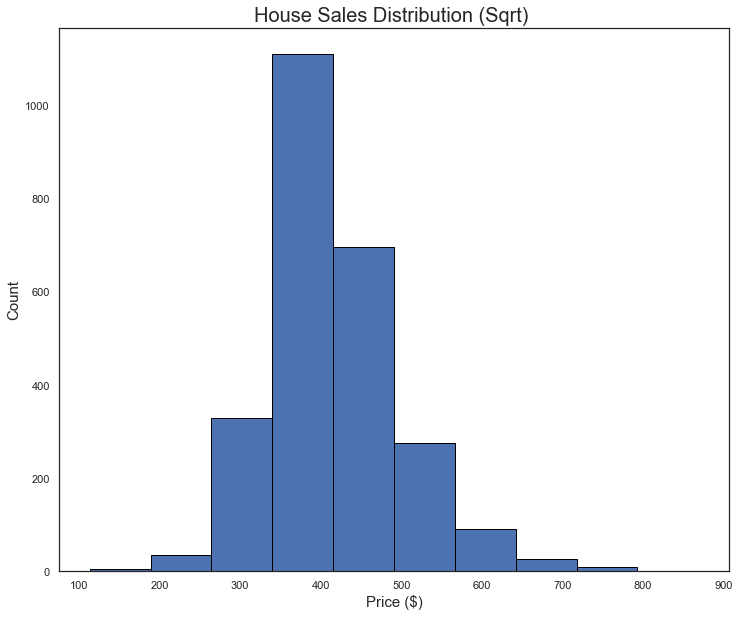

In [171]:
# Calculate sqrt on SalePrice
sqrt_housing = np.sqrt(housing['SalePrice'])

plt.figure(figsize=(12, 10))
plt.hist(sqrt_housing,edgecolor='black')
plt.title("House Sales Distribution (Sqrt) " , fontsize=20)

plt.ylabel("Count", fontsize=15)
plt.xlabel("Price ($)", fontsize=15)

plt.savefig('Price_norm_sqrt.png')

In [172]:
housing.drop_duplicates(keep='first')

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,126000,30,RL,68.516053,7890,Pave,NA,Reg,Lvl,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,Lvl,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,30,RL,68.516053,8854,Pave,NA,Reg,Lvl,...,40,0,NA,NA,NA,0,5,2009,WD,Normal
760,1733,139600,20,RL,68.516053,13680,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
761,2002,145000,90,RH,82.000000,6270,Pave,NA,Reg,HLS,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
762,1842,217500,60,RL,68.516053,8826,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,7,2007,WD,Normal


In [173]:
# Assign features to X and Y


#[SalesCor[SalesCor.values > 0.5].index]

X = housing.drop(['SalePrice'], axis=1)

Y = housing['SalePrice']

## Visualizing the dataset

House Price is highly correlated with : 


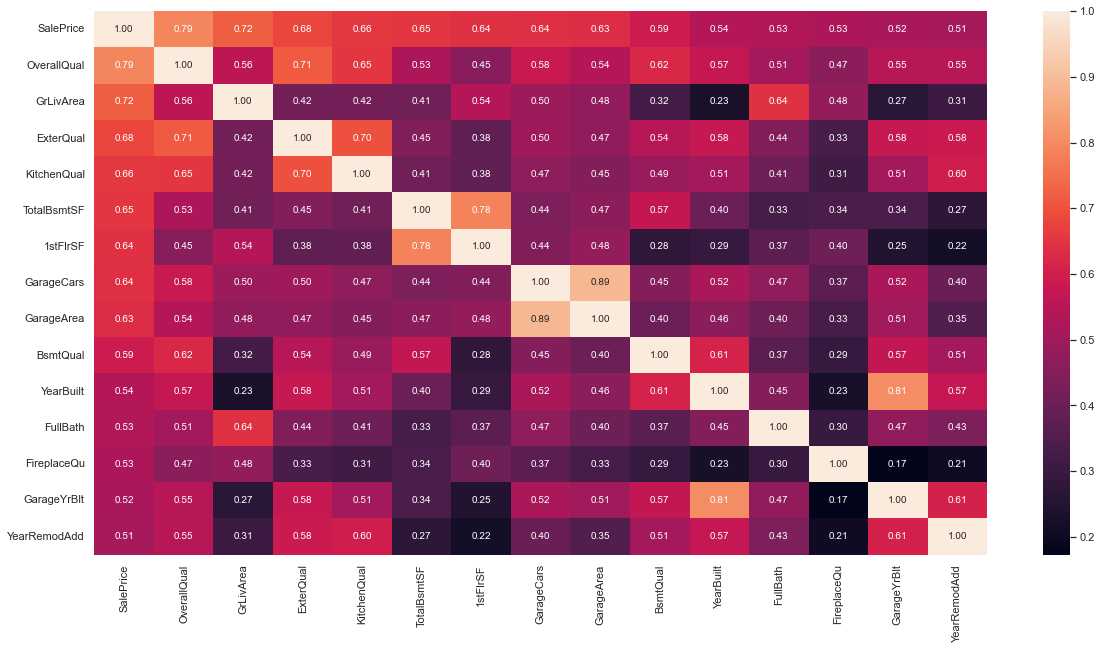

In [174]:
# Features with hight correlation only columns with correlation > 0.5

SalesCor = housing.corr()['SalePrice'].sort_values(ascending= False)

hight_correlation=housing[SalesCor[SalesCor.values > 0.5].index]

corr=hight_correlation.corr()
f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True, fmt = '.2f')

# PRice is gighly correlated with 
print ("House Price is highly correlated with : ")
[SalesCor[SalesCor.values > 0.5].index]


plt.savefig('Sales_corr_plus5.png')

#### From the heat map above , the following features have higher correlation score with the sales column (above 0.5) :

- OverallQual
- GrLivArea
- ExterQual
- KitchenQual
- TotalBsmtSF 
- 1stFlrSF
- GarageCars
- GarageArea 
- BsmtQual
- YearBuilt
- FullBath
- FireplaceQu 
- GarageYrBlt
- YearRemodAdd

### Over all quality and Above grade (ground) living area square feet have higher corrleations with the Sales price.

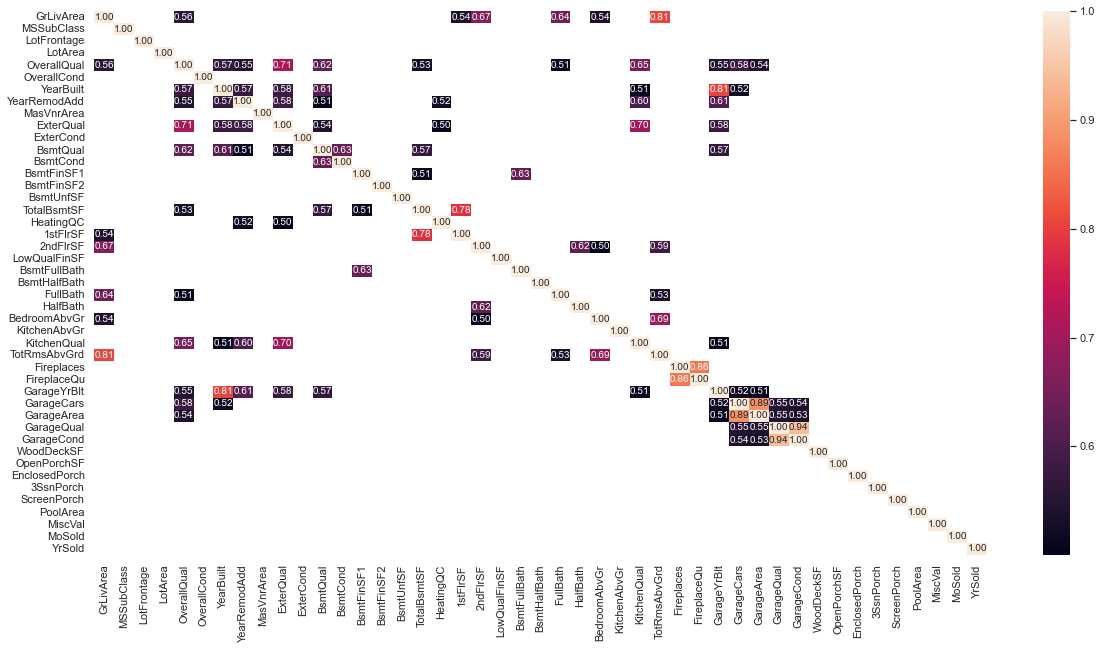

In [175]:
# Features with hight correlation only columns with correlation > 0.5

AllCor = X.corr()

hight_correlation = AllCor[abs(AllCor) >= 0.5]


f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(hight_correlation, annot = True, fmt = '.2f')

plt.savefig('Correlation_exept_sales.png')


#### From the above correlation heat map we can clearly notice the following features having high correlation between each other :

- GarageCars and GarageArea
- GarageYrBlt and YearBuil
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd

In [176]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Top 10 numerical Correlated columns

estimator = LinearRegression()

rfe = RFE(estimator, n_features_to_select=10, step=1)

selector = rfe.fit(X.fillna(0).select_dtypes(exclude='object'), Y)

selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [177]:

plt.figure(figsize=(15, 10))

fig = px.box(housing, x="OverallQual", y="SalePrice",color = 'OverallQual')
fig.update_layout(
    title="House Price by Overall Quality",
    xaxis_title="Quality",
    yaxis_title="Price ($)",
    legend_title="Legend Title",
    showlegend=False,
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
    )




fig.show()





# most important feature is over all quality , price increases with higher house quality

<Figure size 1080x720 with 0 Axes>

### The housing Price increases as Quality increases in general . 

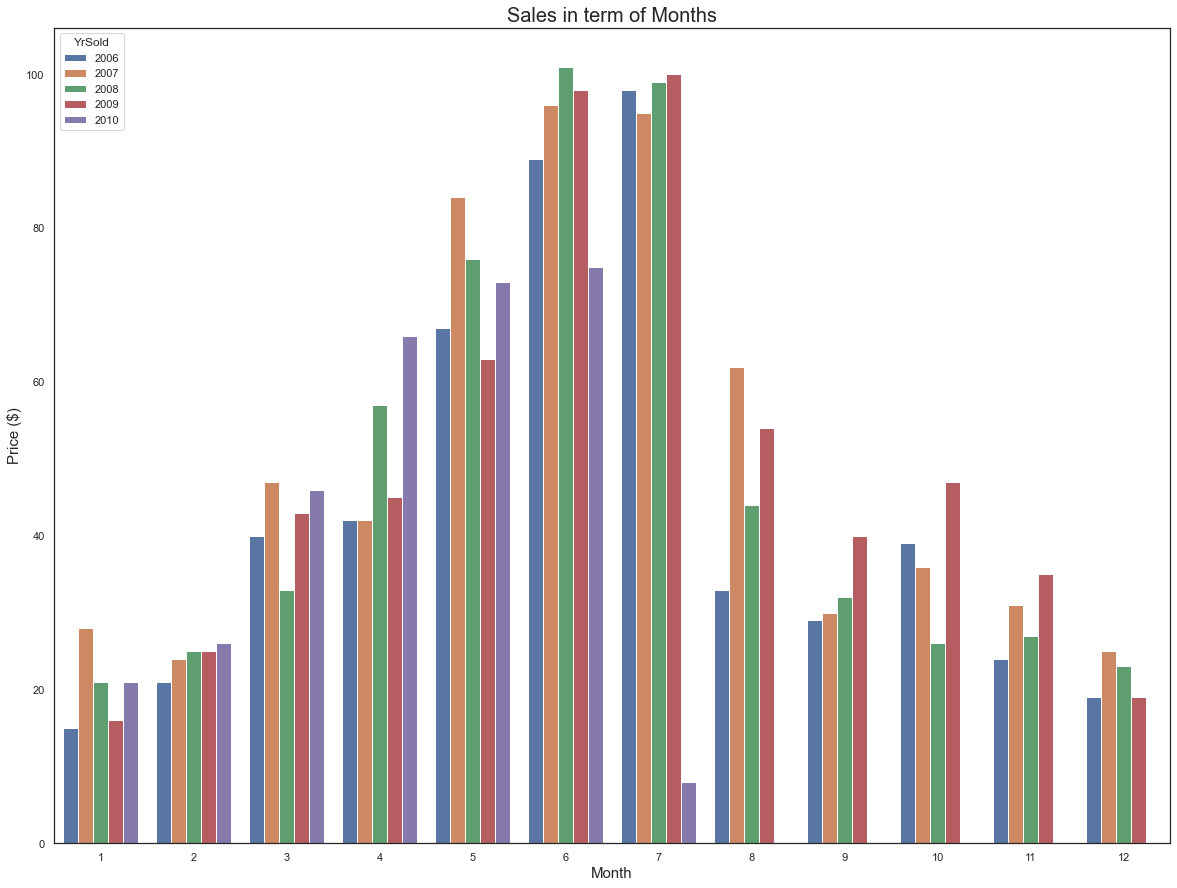

In [178]:
#Count of houses sold against month sold sliced by year sold


sns.set(style="white")
plt.figure(figsize=(20,15))
plt.title("Sales in term of Months" , fontsize=20)
sns.countplot(x='MoSold' , hue="YrSold", data=housing )
plt.xlabel("Month", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.savefig('Sales_by_month.png',dpi=300)
plt.show()



### People tend to buy more houses during the second quarter of the year ( May-August ) . There also might be some correlation to Tempreture degrees and School off period .

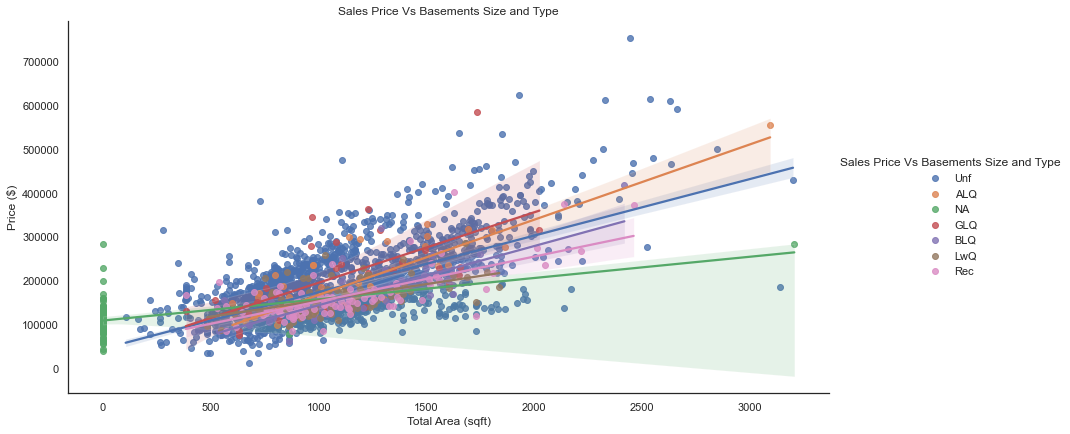

In [179]:
#sales price against Total Basment sliced by BsmtFinType1



s = sns.lmplot(x='TotalBsmtSF', y='SalePrice', hue='BsmtFinType2',
           data=housing, fit_reg=True,height=6, aspect=2 , legend = False).set(title='Sales Price Vs Basements Size and Type',
                                                              xlabel='Total Area (sqft)',
                                                              ylabel='Price ($)')
s.add_legend(title="Sales Price Vs Basements Size and Type")


s.savefig('SalesPriceVsBasementsSizeType.png',dpi=300)

### In this polt we can see the relation between SalePrice and Total square feet of basement area. As the basment area increase the sale price increases. and for areas above 2000 sqft the BLQ type is to dominant in term of sales.

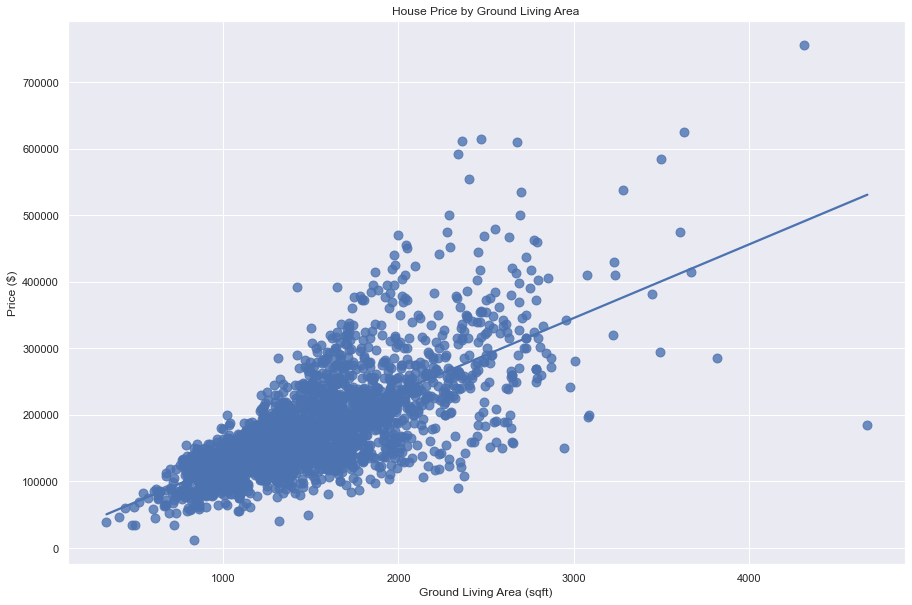

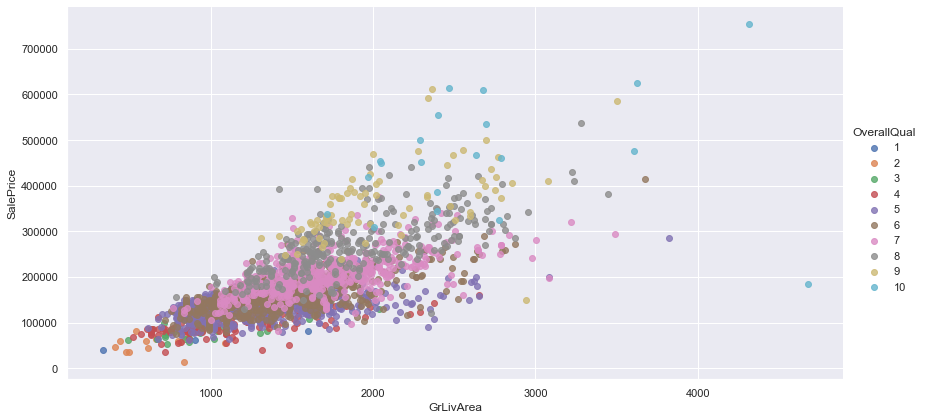

In [180]:
# Ground Living Area


sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.regplot(x="GrLivArea", y="SalePrice",data=housing ,ci=None, scatter_kws={"s": 80}).set(
    xlabel='Ground Living Area (sqft) ', 
    ylabel='Price ($)'
)
title = plt.title('House Price by Ground Living Area ')




#sales price against Living Area sliced by Overall Quality
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual',
           data=housing, fit_reg=False,height=6, aspect=2)

plt.savefig('HousePricebyGroundLivingArea',dpi=300)

# some outliers when GrlivArea > 4000


### Above grade (ground) living area square feet on of features which has hight correlation with Sale Price.

### The sale price increase as the ground area increases. Also, the overall quality shows the quality of the materials used in the construction of the house has a direct relationship with the price.

- some outliers on Areas above 4000 sqrft and less than 200k in price

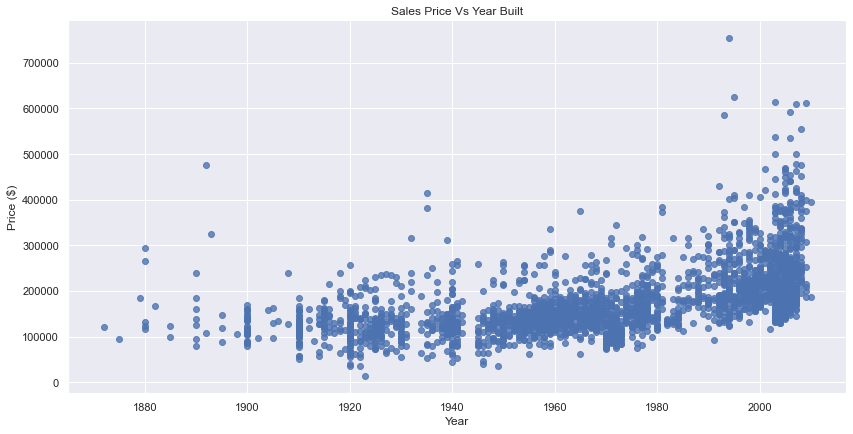

In [181]:

#sales price against Year Built sliced by Sale Condition
sns.lmplot(x='YearBuilt', y='SalePrice'# hue='YearRemodAdd'
           ,
           data=housing, fit_reg=False,height=6, aspect=2).set(title='Sales Price Vs Year Built',
                                                              xlabel='Year',
                                                              ylabel='Price ($)')

plt.savefig('SalesPriceVsYearBuilt.png',dpi=300)

### Newer house are more likely to have higher sale prices .

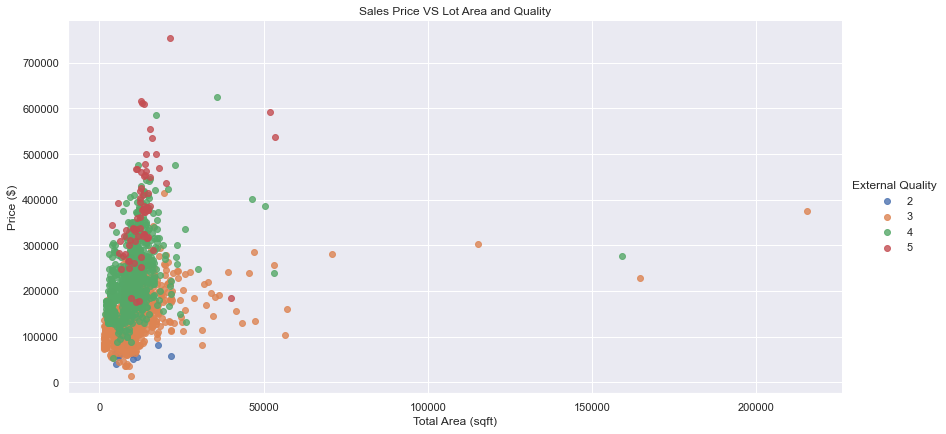

In [182]:
#sales price against LotArea size in square feet sliced by Eternal Quality
s = sns.lmplot(x='LotArea', y='SalePrice', hue='ExterQual',
           data=housing, fit_reg=False,height=6, aspect=2, legend = False).set(title='Sales Price VS Lot Area and Quality',
                                                              xlabel='Total Area (sqft)',
                                                              ylabel='Price ($)')
s.add_legend(title="External Quality")

plt.savefig('ExternalQuality.png',dpi=300)

### (LotArea) Lot size in square feet does not affect the price of the house, I general most houses have small land areas .On the Opposite the external quality affects the price directly.

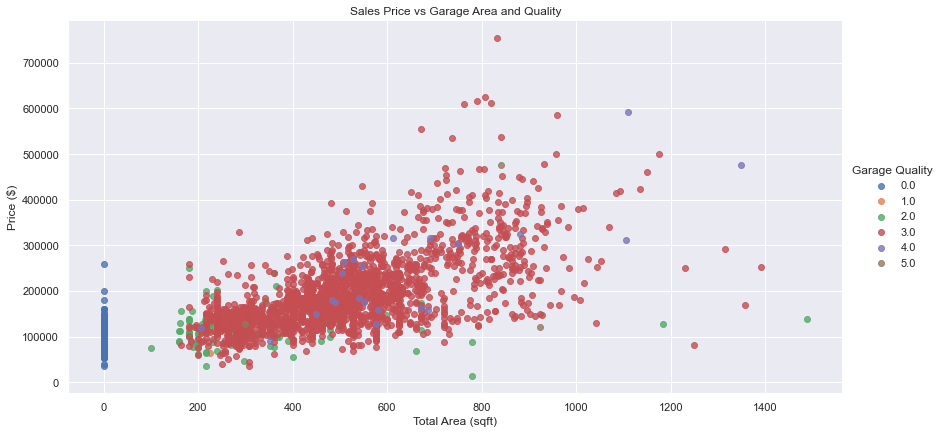

In [183]:
#Sales price against Garage Area sliced by Garage Quality

s = sns.lmplot(x='GarageArea', y='SalePrice', hue='GarageQual',
           data=housing, fit_reg=False,height=6, aspect=2, legend = False).set(title='Sales Price vs Garage Area and Quality',
                                                              xlabel='Total Area (sqft)',
                                                              ylabel='Price ($)')
s.add_legend(title="Garage Quality")

plt.savefig('GarageQuality.png',dpi=300)

### Garage Area affect the house price . but in term of Quality , most sales are concentrated within moderate garage quality not the higher ones .

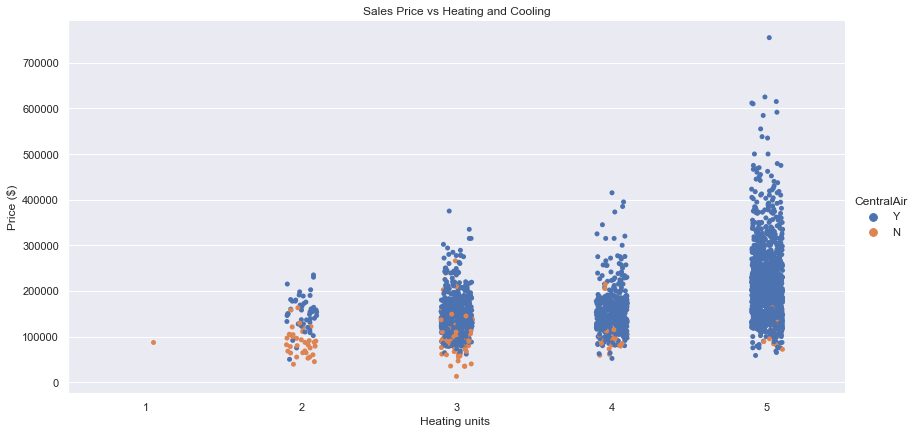

In [184]:
#Sale price vs Heating quality and condition  
sns.catplot(data=housing,x='HeatingQC',y='SalePrice',
               hue='CentralAir',height=6,aspect=2,
               estimator=np.mean).set(title='Sales Price vs Heating and Cooling',
                                                              xlabel='Heating units ',
                                                              ylabel='Price ($)')
plt.savefig('SalesPricevsHeatingCooling.png',dpi=300)

### Customers tend to buy house with more Heating and Central Cooling houses/units

In [185]:
px.box(housing,x='BedroomAbvGr',y='SalePrice'
       #,color='Neighborhood'
       ,
       title='<b>Total Rooms Versus Sales Price of Houses')



### The number of rooms have a low correlation with price in general .

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



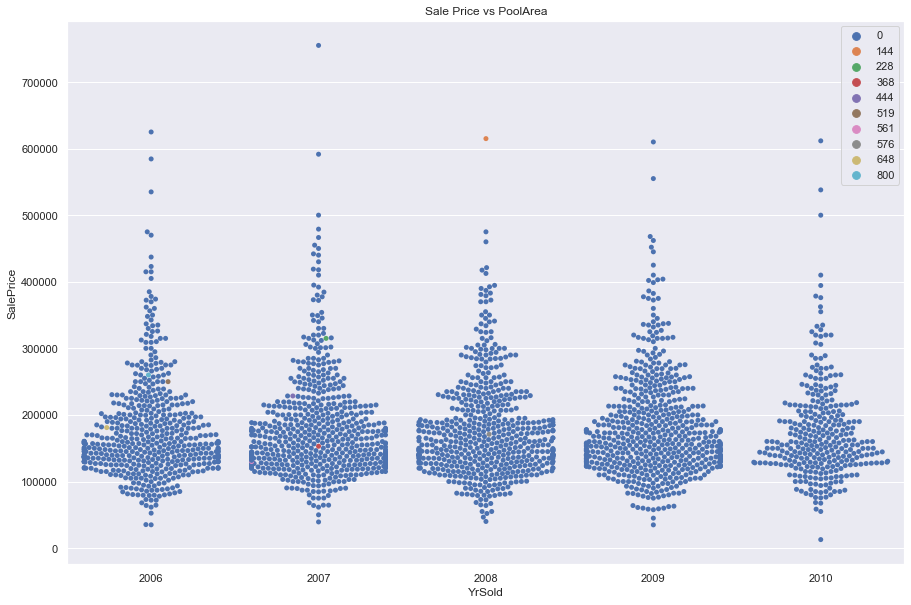

In [186]:
plt.figure(figsize=(15, 10))
sns.swarmplot(x='YrSold',y='SalePrice',hue='PoolArea',data=housing )
plt.title('Sale Price vs PoolArea')
plt.legend(loc='upper right')




plt.savefig('SalePricevsPoolArea.png',dpi=300)

## - Buyers are not interested in whether the house has a swimming pool or not, and this is evident through the years of sale.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

25.4% of the points cannot be placed; you may want to decrease the size of the markers or use s

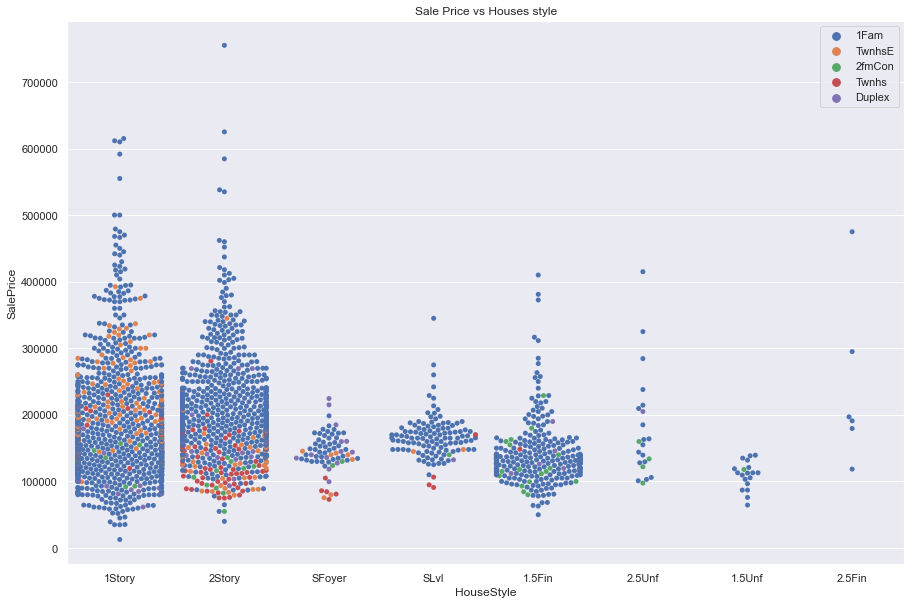

In [187]:
#Sale price against House Style sliced by building type
plt.figure(figsize=(15, 10))
sns.swarmplot('HouseStyle','SalePrice',hue='BldgType',alpha=1,data=housing )
plt.title('Sale Price vs Houses style')
plt.legend(loc='upper right')


plt.savefig('SalePricevsHousesStyle.png',dpi=300)

## - The majority of buyers buy one-story or two-story homes with one family building type.

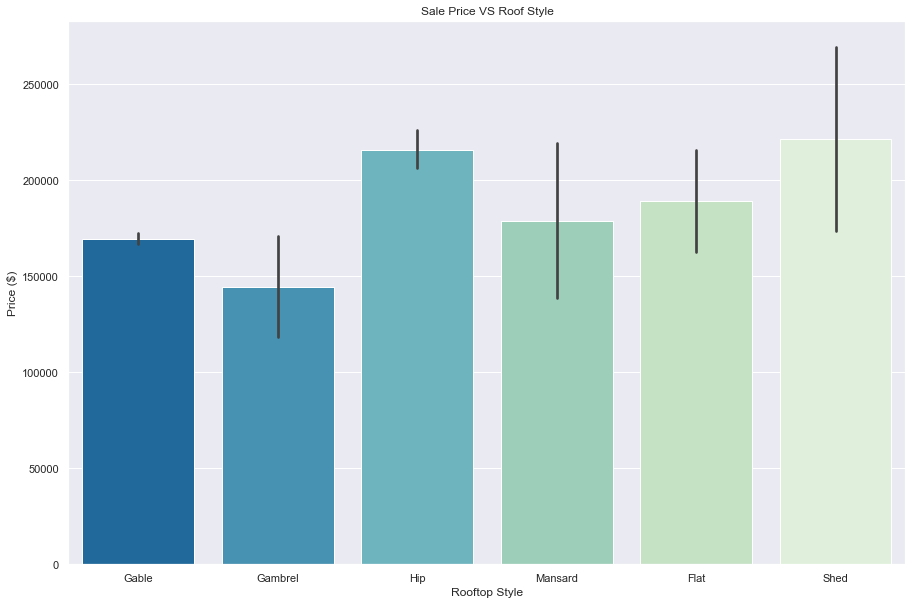

In [188]:
plt.figure(figsize=(15, 10))
housing_sort=housing.sort_values('SalePrice',ascending=True)
sns.barplot(data=housing_sort,
            y='SalePrice',
            x='RoofStyle',
            palette='GnBu_r'
            #,hue='RoofMatl'
           ).set(title='Sale Price VS Roof Style'
                 ,xlabel='Rooftop Style'
                 ,ylabel='Price ($)')

plt.savefig('SalePriceVSRoofStyle.png',dpi=300)

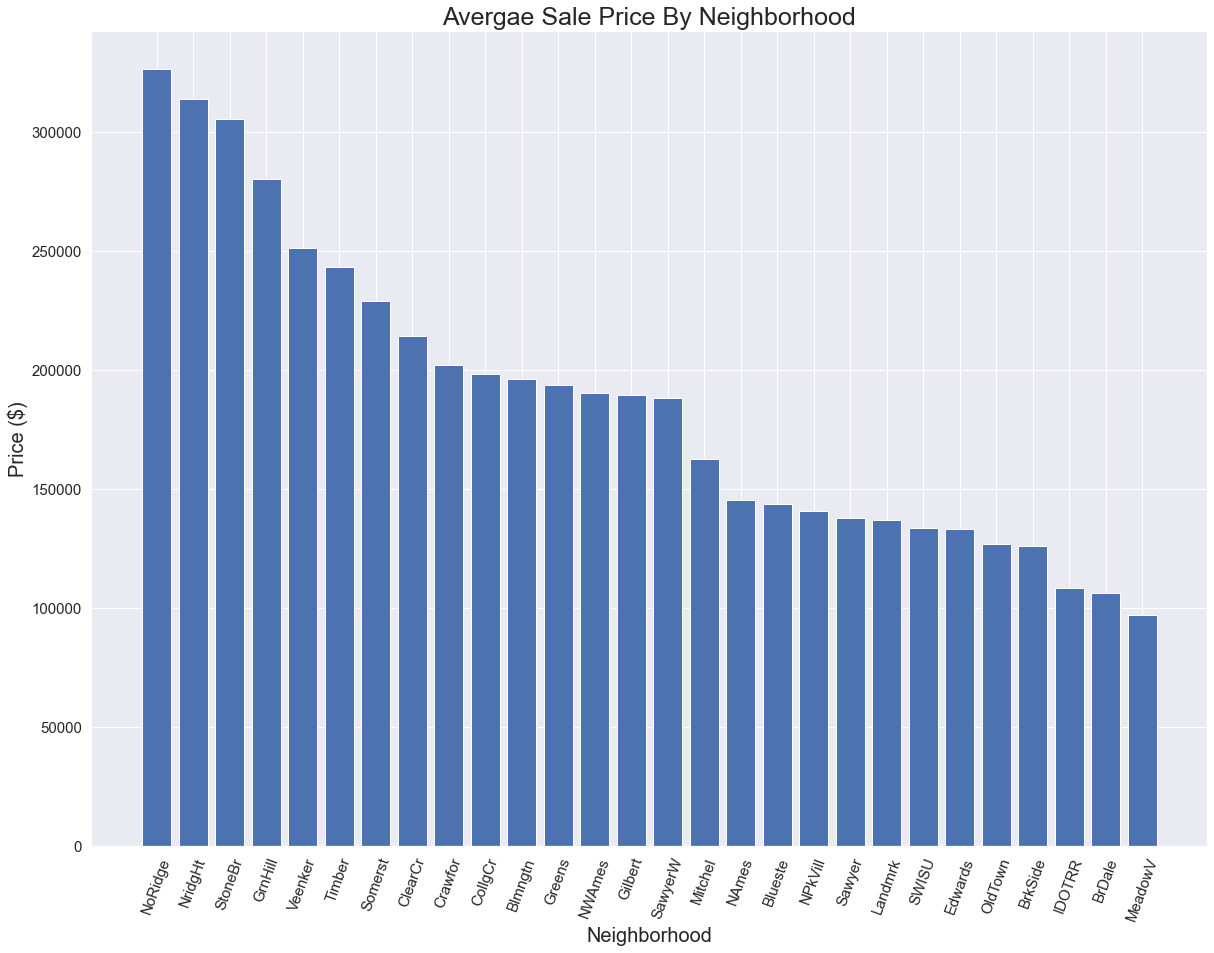

In [189]:
#housing.groupby(['YearBuilt', 'SalePrice'])['YearBuilt', 'SalePrice'].agg('sum')

ByNei = housing.groupby(['Neighborhood'])['SalePrice'].agg('mean')

ByNei = ByNei.sort_values(ascending=False)

plt.figure(figsize=(20,15))

plt.bar(ByNei.index,ByNei.values)

plt.title("Avergae Sale Price By Neighborhood" , fontsize=25)

plt.xlabel("Neighborhood", fontsize=20)
plt.ylabel("Price ($)", fontsize=20)

plt.xticks(rotation = 70 , fontsize=15)

                     
plt.yticks(fontsize=15)


plt.savefig('AvergaeSalepriceByNeighborhood.png',dpi=300)


plt.show()



## ML Prediction

### Linear Regression

In [190]:
# Importing Libraries

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import arange
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [191]:
# since LR is very seneitive to outliers we will remove them :


X.drop(housing[(housing.GrLivArea > 4000)& (housing.SalePrice < 200000)].index, axis=0, inplace=True)
Y.drop(housing[(housing.GrLivArea > 4000)& (housing.SalePrice < 200000)].index, axis=0, inplace=True)

print(X.shape)
print(Y.shape)

(2577, 79)
(2577,)


# Using All Features

In [192]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
X['MSSubClass'] = X['MSSubClass'].apply(str)
X['YrSold'] = X['YrSold'].astype(str)
X['MoSold'] = X['MoSold'].astype(str)

X['Functional'] = X['Functional'].fillna('Typ')
X['Electrical'] = X['Electrical'].fillna("SBrkr")
X['KitchenQual'] = X['KitchenQual'].fillna("TA")
X['Exterior1st'] = X['Exterior1st'].fillna(X['Exterior1st'].mode()[0])
X['Exterior2nd'] = X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0])
X['SaleType'] = X['SaleType'].fillna(X['SaleType'].mode()[0])
X["PoolQC"] = X["PoolQC"].fillna("None")

In [193]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    X[col] = X[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    X[col] = X[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    X[col] = X[col].fillna('None')

X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [194]:
# dropping some un-used columns

X = X.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [195]:



# Adding new features 


X['YrBltAndRemod']=X['YearBuilt']+X['YearRemodAdd']
X['TotalSF']=X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

X['Total_sqr_footage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] +
                                 X['1stFlrSF'] + X['2ndFlrSF'])

X['Total_Bathrooms'] = (X['FullBath'] + (0.5 * X['HalfBath']) +
                               X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath']))

X['Total_porch_sf'] = (X['OpenPorchSF'] + X['3SsnPorch'] +
                              X['EnclosedPorch'] + X['ScreenPorch'] +
                              X['WoodDeckSF'])



X['IsNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

In [196]:
# simplified features (convert string binary categorical values into 0 and 1)
X['haspool'] = X['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
X['has2ndfloor'] = X['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasgarage'] = X['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
X['hasbsmt'] = X['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasfireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [197]:
objects = []
for i in X.columns:
    if X[i].dtype == object:
        objects.append(i)

X.update(X[objects].fillna('None'))

In [198]:
# Filling in the rest of the NA's
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics.append(i)
X.update(X[numerics].fillna(0))

In [199]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics2.append(i)

In [200]:
X.shape

(2577, 87)

In [201]:
X = pd.get_dummies(X).reset_index(drop=True)
X.shape

(2577, 302)

In [202]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)

In [203]:
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=2) 

In [204]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [205]:
# Function to print R2 Scores

def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for {model} is {round(cross_val_score(model, X_train, y_train).mean(),4)}')
    print(f'The training score is {round(model.score(X_train, y_train), 4)}')
    print(f'The testing score is {round(model.score(X_test, y_test),4)}')
    print(f'The number of features is : {np.sum(model.coef_ != 0)}')

### Linear Regression (All Features)

In [206]:
regr=LinearRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)

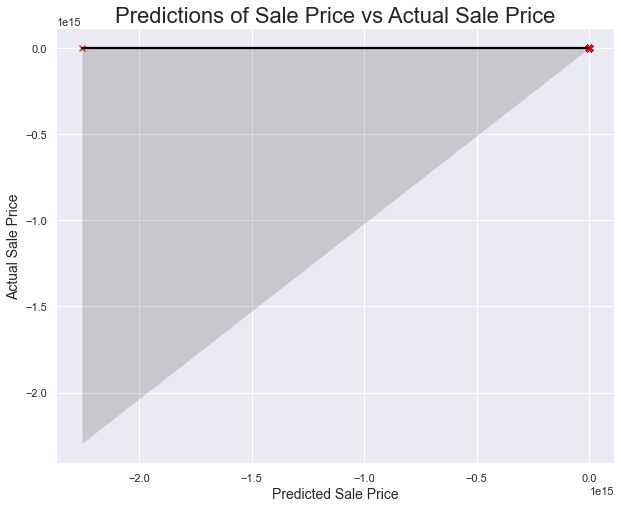

In [207]:
# LR effeciency 


LR_score_all = regr.score(X_test,y_test)
plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=pred, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)


plt.savefig('PredictionsofSalePricevsActualSalePrice.png',dpi=300)

### Decsision Trees ( All Features )

In [208]:
tree_model =DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)

In [209]:
# Accurancy
DT_score_all = accuracy_score(y_test,tree_pred)

DT_score_all

# extremely low

0.015503875968992248

## Gradient Boosting Model ( All Features)

In [210]:
gbm = GradientBoostingRegressor()


In [211]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [212]:
gbm_score_all = gbm.score(X_train,y_train)
gbm_pred=gbm.predict(X_test)

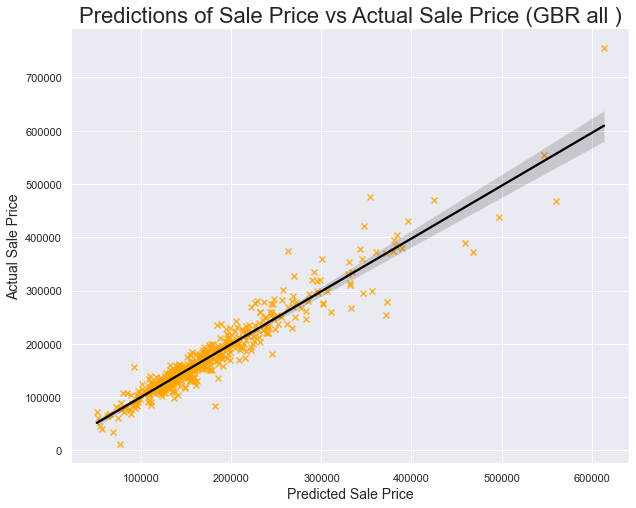

In [213]:
plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=gbm_pred, y=y_test, marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price (GBR all )', fontsize=22)


plt.savefig('PredictionsofSalePricevsActualSalePriceGBRall.png',dpi=300)




In [214]:
importance = sorted(list(zip(X_train.columns, list(gbm.feature_importances_))), key=lambda t:t[1], reverse=True)

a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})

importance_fet = importance_score[importance_score['score'] > 0.01]

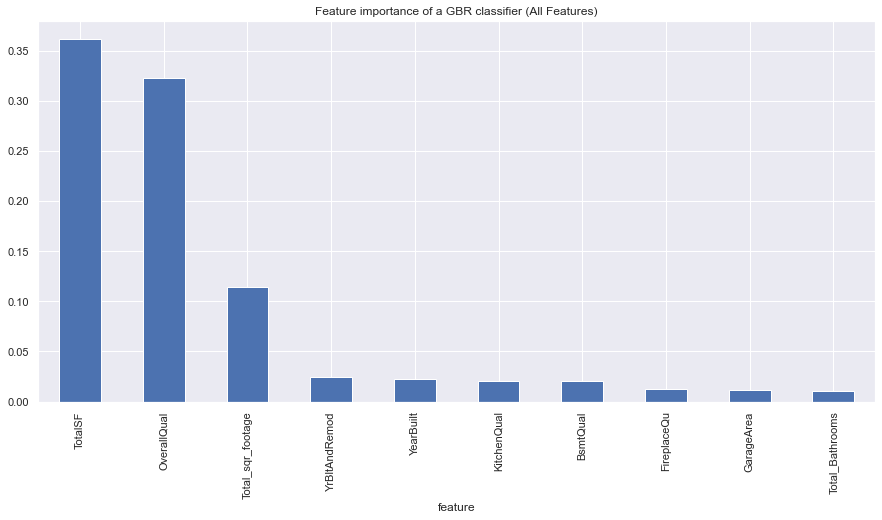

In [215]:
#list top 10 importance features for gbm
plt.rcParams["figure.figsize"] = (15, 7)
importance_fet.plot.bar(x='feature', y='score', legend=None)
plt.title('Feature importance of a GBR classifier (All Features)')

plt.savefig('FeatureimportanceofaGBRclassifierAll Features.png',dpi=300)

## Lasso ( All Features)

In [216]:
lasso = Lasso(alpha = 0.0002)
lasso.fit(X_train, y_train);


display_R2_scores(lasso, X_train, y_train, X_test, y_test)

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.411e+11, tolerance: 1.139e+09

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+11, tolerance: 8.756e+08

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.430e+

The mean cross validation score for Lasso(alpha=0.0002) is 0.9086
The training score is 0.9401
The testing score is 0.9159
The number of features is : 286


/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.477e+11, tolerance: 9.112e+08



In [217]:
y_pred=lasso.predict(X_test)

In [218]:
print("Slope: %.2f" % lasso.coef_[0])
print("Intercept:%.2f"% lasso.intercept_)

Slope: 98.74
Intercept:-774691.76


In [219]:

lasso_score_all = lasso.score(X_test,y_test)

print("Rsquared:%.2f" % lasso_score_all )

Rsquared:0.92


In [220]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

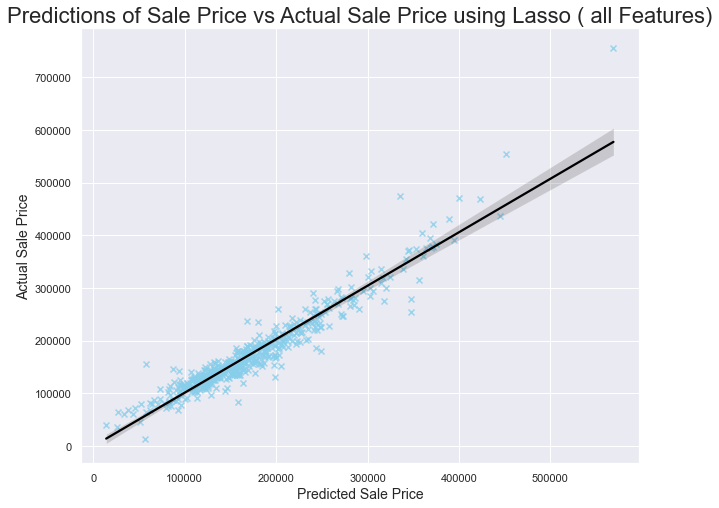

In [221]:
lasso_predict = lasso.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=lasso_predict, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price using Lasso ( all Features)', fontsize=22)

plt.savefig('PredictionsofSalePricevsActualSalePriceusingLassoallFeatures.png',dpi=300)

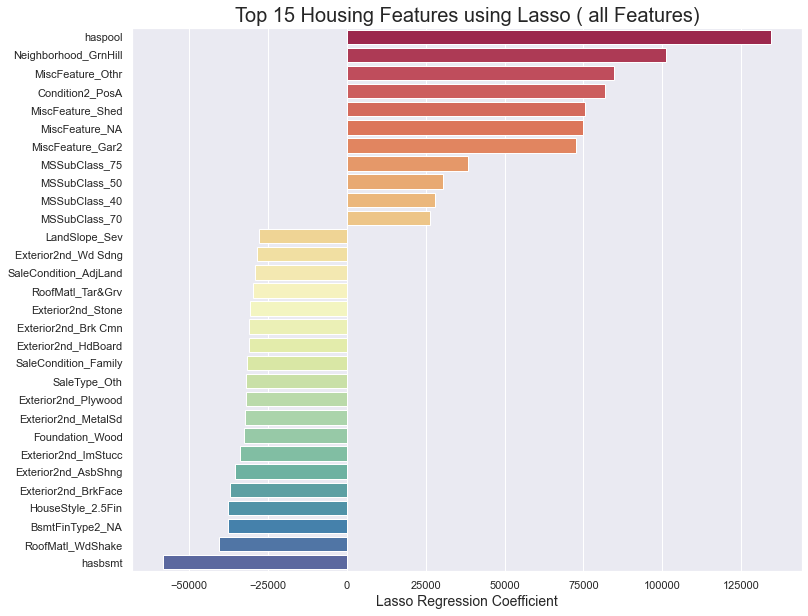

In [223]:
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lasso.coef_)
lasso_df['Coef'] = lasso.coef_
lasso_df['Feature'] = X.columns 

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(30)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 15 Housing Features using Lasso ( all Features)', fontsize=20);

plt.savefig('Top15HousingFeaturesusingLassoall Features.png',dpi=300)

## Ridge

In [224]:
ridge = Ridge(alpha = 10222) # To improve my Ridge, I manually adjusted the alpha score; the Ridge CV returned smaller alphas (even if the upper limit was increased) 
ridge = ridge.fit(X_train, y_train)


display_R2_scores(ridge, X_train, y_train, X_test, y_test)

ridge_score_all = ridge.score(X,Y)

The mean cross validation score for Ridge(alpha=10222) is 0.8411
The training score is 0.852
The testing score is 0.8257
The number of features is : 286


# Using only High correlated Features

In [225]:
X.corr()


,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
GrLivArea,1.000000,0.306934,0.253745,0.558312,-0.105168,0.227226,0.305740,0.380503,0.413191,-0.006306,...,-0.033165,0.102767,-0.028140,-0.023981,-0.032845,0.018240,0.009294,0.013315,-0.057609,0.098259
LotFrontage,0.306934,1.000000,0.338844,0.163391,-0.048007,0.092485,0.057470,0.179934,0.113649,-0.013277,...,-0.042840,0.055236,0.008143,-0.028294,0.009774,-0.026286,0.028661,-0.012688,-0.040657,0.052142
LotArea,0.253745,0.338844,1.000000,0.076754,-0.032198,0.010761,0.008744,0.098678,0.040598,0.000188,...,-0.015868,0.017909,-0.000257,-0.003433,0.002993,-0.002551,0.005603,0.019320,-0.022387,0.018982
OverallQual,0.558312,0.163391,0.076754,1.000000,-0.095155,0.574109,0.546102,0.399370,0.713134,-0.007164,...,-0.047781,0.216781,-0.037371,-0.070012,-0.076038,-0.011099,-0.022925,0.000917,-0.102019,0.215904
OverallCond,-0.105168,-0.048007,-0.032198,-0.095155,1.000000,-0.396304,0.067029,-0.141391,-0.139777,0.410432,...,-0.018322,-0.095374,0.004636,0.114183,-0.033481,-0.002937,-0.004155,-0.040649,0.104604,-0.097326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.018240,-0.026286,-0.002551,-0.011099,-0.002937,-0.019990,-0.028917,0.012573,-0.018461,-0.006930,...,-0.001555,-0.004924,-0.001099,0.007796,-0.004339,1.000000,-0.001099,-0.002271,-0.106555,-0.005020
SaleCondition_Alloca,0.009294,0.028661,0.005603,-0.022925,-0.004155,-0.009365,-0.002404,-0.014412,-0.026119,-0.009805,...,-0.002200,-0.006966,-0.001555,0.011029,-0.006139,-0.001099,1.000000,-0.003213,-0.150750,-0.007103
SaleCondition_Family,0.013315,-0.012688,0.019320,0.000917,-0.040649,-0.012457,-0.042771,0.033273,-0.036826,0.017975,...,0.081620,-0.014397,-0.003213,-0.014161,-0.012689,-0.002271,-0.003213,1.000000,-0.311567,-0.014680
SaleCondition_Normal,-0.057609,-0.040657,-0.022387,-0.102019,0.104604,-0.112748,-0.089982,-0.063565,-0.121733,0.022891,...,-0.013899,-0.675477,-0.110484,0.531762,-0.595328,-0.106555,-0.150750,-0.311567,1.000000,-0.688758


In [226]:
housing.corr()['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
ExterQual        0.682470
KitchenQual      0.655118
TotalBsmtSF      0.652192
1stFlrSF         0.642613
GarageCars       0.638722
GarageArea       0.634669
BsmtQual         0.587704
YearBuilt        0.544370
FullBath         0.534982
FireplaceQu      0.527212
GarageYrBlt      0.517847
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
HeatingQC        0.435850
LotFrontage      0.338396
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
GarageQual       0.273221
2ndFlrSF         0.263144
GarageCond       0.252923
BsmtCond         0.207367
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
ExterCond        0.011270
YrSold      

In [227]:
 X.skew().sort_values(ascending=False)

Exterior1st_CBlock       35.874766
Neighborhood_GrnHill     35.874766
SaleCondition_AdjLand    35.874766
Condition2_PosN          35.874766
Exterior1st_AsphShn      35.874766
                           ...    
MiscFeature_NA           -4.861443
hasbsmt                  -5.913109
Heating_GasA             -7.842982
RoofMatl_CompShg         -8.287185
Condition2_Norm         -10.222820
Length: 286, dtype: float64

In [228]:
X.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD ',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [229]:
X = X[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
        'TotalBsmtSF', 'GarageCars','TotalBsmtSF', 'BsmtQual', 'FireplaceQu', 'YearRemodAdd',
        'MasVnrArea', 'Fireplaces', 'BsmtFinSF1','Total_sqr_footage']]
X




,OverallQual,GrLivArea,ExterQual,KitchenQual,TotalBsmtSF,GarageCars,TotalBsmtSF,BsmtQual,FireplaceQu,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,Total_sqr_footage
0,6,856,3,3,856.0,2.0,856.0,3.0,4.0,1950,0.0,1,238.0,1094.0
1,5,1049,4,4,1049.0,1.0,1049.0,4.0,0.0,1984,149.0,0,552.0,1994.0
2,5,1001,4,4,837.0,1.0,837.0,3.0,0.0,2007,0.0,0,737.0,1738.0
3,4,1039,4,3,405.0,1.0,405.0,2.0,0.0,2003,0.0,0,0.0,1039.0
4,8,1665,4,4,810.0,2.0,810.0,4.0,0.0,2001,0.0,0,643.0,2308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,6,952,3,2,952.0,1.0,952.0,3.0,4.0,1950,0.0,1,0.0,952.0
2573,3,1733,3,3,0.0,2.0,0.0,0.0,4.0,1955,0.0,1,0.0,1733.0
2574,5,2002,3,3,1001.0,3.0,1001.0,3.0,0.0,1950,0.0,0,284.0,2286.0
2575,7,1842,4,4,985.0,2.0,985.0,4.0,3.0,2000,144.0,1,841.0,2683.0


In [230]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X


X.shape: (2577, 14)


,OverallQual,GrLivArea,ExterQual,KitchenQual,TotalBsmtSF,GarageCars,TotalBsmtSF,BsmtQual,FireplaceQu,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,Total_sqr_footage
0,6,856,3,3,856.0,2.0,856.0,3.0,4.0,1950,0.0,1,238.0,1094.0
1,5,1049,4,4,1049.0,1.0,1049.0,4.0,0.0,1984,149.0,0,552.0,1994.0
2,5,1001,4,4,837.0,1.0,837.0,3.0,0.0,2007,0.0,0,737.0,1738.0
3,4,1039,4,3,405.0,1.0,405.0,2.0,0.0,2003,0.0,0,0.0,1039.0
4,8,1665,4,4,810.0,2.0,810.0,4.0,0.0,2001,0.0,0,643.0,2308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,6,952,3,2,952.0,1.0,952.0,3.0,4.0,1950,0.0,1,0.0,952.0
2573,3,1733,3,3,0.0,2.0,0.0,0.0,4.0,1955,0.0,1,0.0,1733.0
2574,5,2002,3,3,1001.0,3.0,1001.0,3.0,0.0,1950,0.0,0,284.0,2286.0
2575,7,1842,4,4,985.0,2.0,985.0,4.0,3.0,2000,144.0,1,841.0,2683.0


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size=0.33, random_state=42)

In [232]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

## Linear Regression (Partial Features)

In [233]:
# Linear Regression


ln = LinearRegression()
ln.fit(X_train, y_train)


display_R2_scores(ln, X_train, y_train, X_test, y_test)

print("Training RMSE(LR): " + str(np.sqrt(mean_squared_error(y_train, ln.predict(X_train)))))
print("Testing RMSE(LR): " + str(np.sqrt(mean_squared_error(y_test,ln.predict(X_test)))))


LR_score_part = ln.score(X,Y)

#overfitting


The mean cross validation score for LinearRegression() is 0.8682
The training score is 0.8731
The testing score is 0.848
The number of features is : 14
Training RMSE(LR): 26706.794803025903
Testing RMSE(LR): 29284.291142690436


## Decision Trees

In [234]:
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)

DT_score_part = accuracy_score(y_test,tree_pred)

DT_score_part

# Very Low

0.008225616921269096

## Gradient Boosting Model ( All Features)

In [235]:
gbm.set_params(verbose=1)

GradientBoostingRegressor(verbose=1)

In [236]:
gbm.fit(X,Y)

      Iter       Train Loss   Remaining Time 
         1  4811231981.0777            3.52s
         2  4144469060.4945            2.75s
         3  3577685013.6577            2.31s
         4  3103300251.1554            2.05s
         5  2712797656.1383            1.84s
         6  2387736700.3219            1.72s
         7  2104917636.5749            1.61s
         8  1871062306.3364            1.53s
         9  1663978240.2412            1.49s
        10  1488050305.8384            1.44s
        20   670211309.5051            1.15s
        30   472009824.0514            0.94s
        40   409557949.8076            0.79s
        50   384723502.6852            0.65s
        60   368852414.7750            0.52s
        70   355774321.8562            0.40s
        80   345300173.2198            0.27s
        90   334753355.7996            0.13s
       100   326236692.5748            0.00s


GradientBoostingRegressor(verbose=1)

In [237]:
# R^2 of the fit

gbm_score_part = gbm.score(X,Y)

print ("The total score of the fit %.3f" % gbm_score_part)

print('Training Accuracy %.3f' %(gbm.score(X_train, y_train)))
print('Testing Accuracy %.3f' %(gbm.score(X_test, y_test)))



The total score of the fit 0.942
Training Accuracy 0.945
Testing Accuracy 0.937


In [238]:
sorted_importance = sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.48388057652863703),
 ('Total_sqr_footage', 0.24266184619679354),
 ('GrLivArea', 0.07787872332362633),
 ('GarageCars', 0.036999974216898206),
 ('ExterQual', 0.03480415637899452),
 ('BsmtQual', 0.024214842346211046),
 ('TotalBsmtSF', 0.02405558400302665),
 ('YearRemodAdd', 0.018167257450336483),
 ('KitchenQual', 0.017770979452237677),
 ('TotalBsmtSF', 0.017758273478604567),
 ('FireplaceQu', 0.010136785831530645),
 ('MasVnrArea', 0.005728824207368629),
 ('Fireplaces', 0.003834693079266955),
 ('BsmtFinSF1', 0.002107483506467527)]

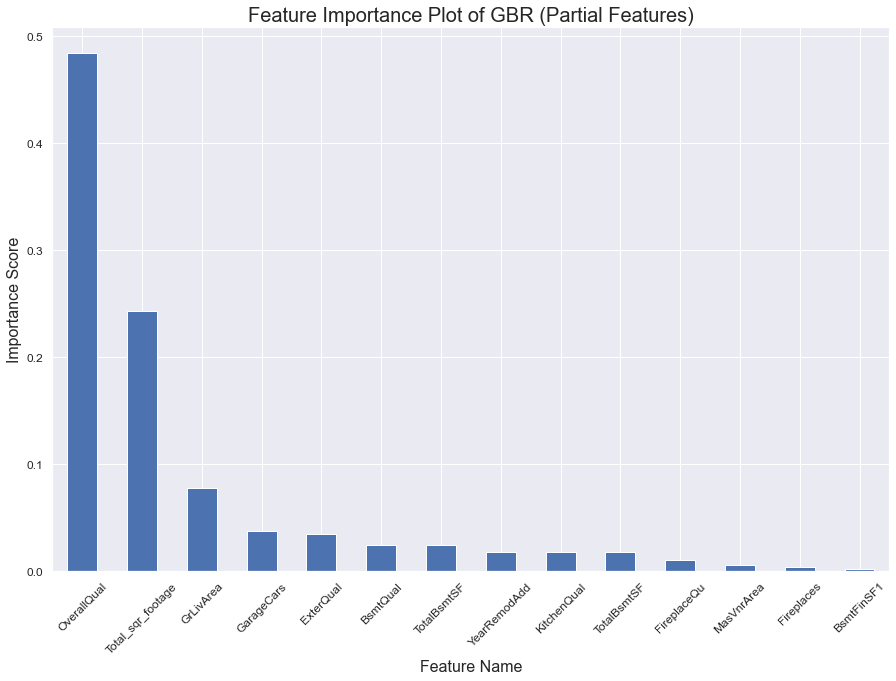

In [239]:
# Pltting the features importance


F, I = zip(*sorted_importance) # this splits the list of tuples into two lists


pd.DataFrame({'feature_name':F, 'importance_score':I}).plot.bar(x='feature_name',y='importance_score', legend=None
                                                                ,figsize=(15,10))
plt.title('Feature Importance Plot of GBR (Partial Features)' , fontsize=20)
plt.xlabel('Feature Name', fontsize=16)
plt.xticks(rotation = 45 , fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Importance Score', fontsize=16)


plt.savefig('FeatureImportancePlotofGBRPartialFeatures.png',dpi=300)

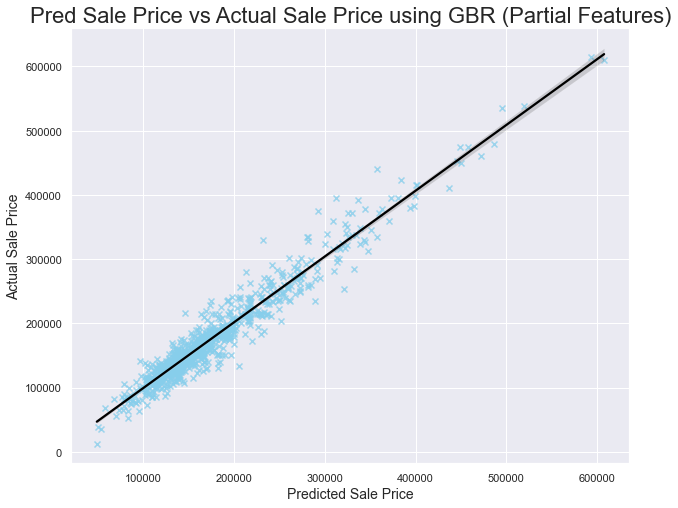

In [242]:
# We Say that Lasso is most succesful model


pred_gbm = gbm.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=pred_gbm, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Pred Sale Price vs Actual Sale Price using GBR (Partial Features)', fontsize=22)

plt.savefig('PredictionsofSalePricevsActualSalePriceusingGradientBoostingRegressorPartialFeatures.png',dpi=300)

## Lasso ( Partial Features)

In [243]:
# finding the best alpha


las = Lasso(max_iter=10000)
grid_values = {'alpha': [0.0001,0.0002,0.00025, 0.0003, 0.00036, 0.00037, 0.000375, 0.00038, 0.00039,0.000395, 0.0004,0.00045,0.00047, 0.0005,0.00051, 0.00052, 0.00055, 0.0006,0.0008,0.001,0.01, 0.02]}
grid_las_mse = GridSearchCV(las, param_grid = grid_values, scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_las_mse.fit(X_train, y_train)
print('Grid best parameter (min. mse): ', grid_las_mse.best_params_)

Grid best parameter (min. mse):  {'alpha': 0.02}


In [244]:
lasso = Lasso(alpha = 0.02 , max_iter=10000)
lasso.fit(X_train, y_train);

lasso_score_part = lasso.score(X_train, y_train)

display_R2_scores(lasso, X_train, y_train, X_test, y_test)
print('R squared training set', round(lasso_score_part *100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

The mean cross validation score for Lasso(alpha=0.02, max_iter=10000) is 0.8682
The training score is 0.8731
The testing score is 0.848
The number of features is : 14
R squared training set 87.31
R squared test set 84.8


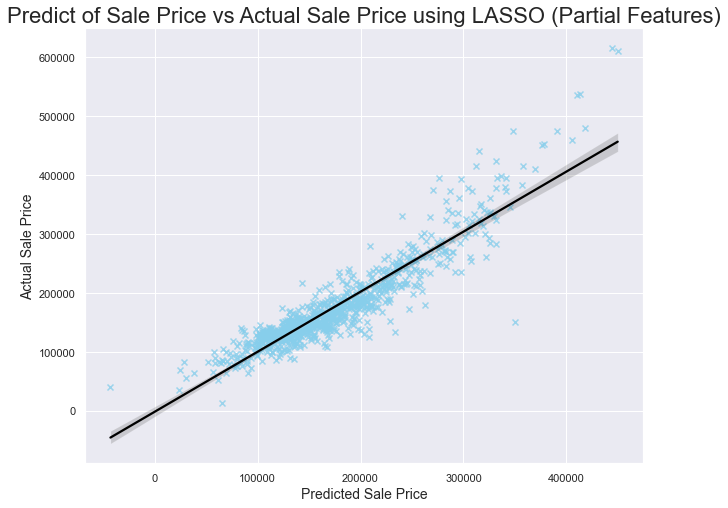

In [245]:
lasso_predict = lasso.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=lasso_predict, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predict of Sale Price vs Actual Sale Price using LASSO (Partial Features)', fontsize=22)

plt.savefig('PredictionsofSalePricevsActualSalePriceusingLASSOPartialFeatures.png',dpi=300)

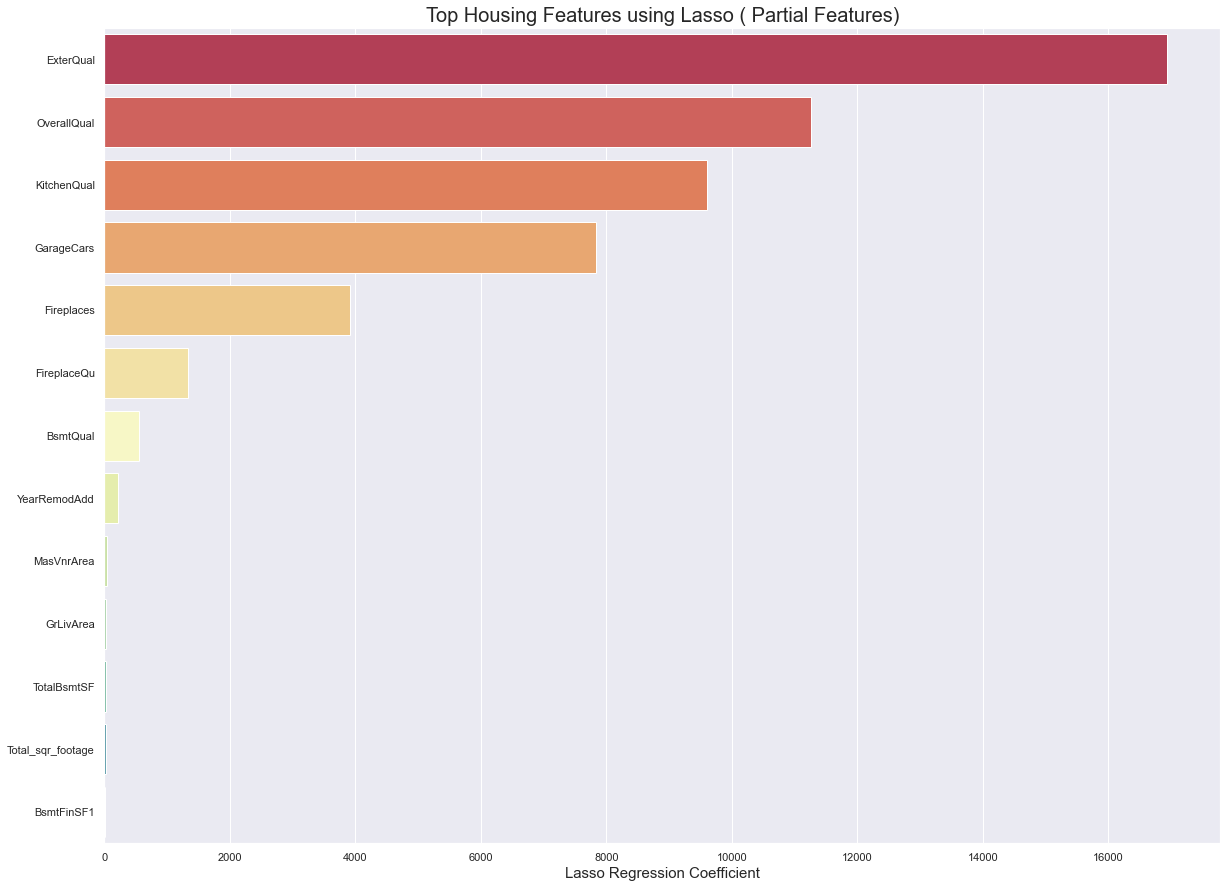

In [247]:
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lasso.coef_)
lasso_df['Coef'] = lasso.coef_
lasso_df['Feature'] = X.columns 


# Plot top 30 features (sorted by absolute regression coefficient)

plt.figure(figsize=(20,15))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(13)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=15)
plt.title('Top Housing Features using Lasso ( Partial Features)', fontsize=20)
plt.savefig('TopHousingFeaturesusingLassoPartialFeatures.png',dpi=300)
plt.show()




## Ridge (Partial Features)

In [248]:
# Ridge

ridge = Ridge(alpha = 10222) # To improve my Ridge, I manually adjusted the alpha score; the Ridge CV returned smaller alphas (even if the upper limit was increased) 
ridge = ridge.fit(X_train, y_train)


display_R2_scores(ridge, X_train, y_train, X_test, y_test)


ridge_score_part = ridge.score(X,Y)

The mean cross validation score for Ridge(alpha=10222) is 0.8122
The training score is 0.8214
The testing score is 0.7893
The number of features is : 14


In [249]:

# plt.figure(figsize=(10,8))
# ax = sns.scatterplot(data=housing, x=y_test, y=y_test-lasso_predict)
# ax.axhline(y=0, c='red')
# plt.xlabel('Predicted Sale Price', fontsize=16)
# plt.ylabel('Actual Sale Price', fontsize=16)
# plt.title('Residuals', fontsize=25)

In [250]:

results = [ ['Lasso', lasso_score_all,ridge_score_part],
           ['Gradient Boosting Regressor' , gbm_score_all,gbm_score_part ]
           #,['Linear Regression',LR_score_all,LR_score_part]
           ,['Ridge',ridge_score_all,ridge_score_part]
          ,['Decision Trees',DT_score_all,DT_score_part]]

            

CompareModels = pd.DataFrame(results,
                  columns = ['Name' , 'Score_all','Score_part'])



CompareModels['Score_all'] = CompareModels['Score_all'].apply(lambda x: round(x, 4))


 
# CompareModels = CompareModels.sort_values('Score_all',ascending=True)


# # boxplot algorithm comparison


# fig = px.bar(CompareModels, x="Name", y="Score",color = 'Name')
# fig.update_layout(
#     title="Modles Comparison",
#     xaxis_title="Name",
#     yaxis_title="Score",
#     legend_title="Legend Title",
#     showlegend=False,
#      xaxis = dict(
#         tickmode = 'linear',
#         tick0 = 1,
#         dtick = 1
#     )
#     )

# fig.show()

CompareModels.round(4)

,Name,Score_all,Score_part
0,Lasso,0.9159,0.8108
1,Gradient Boosting Regressor,0.9693,0.9420
2,Ridge,0.8464,0.8108
3,Decision Trees,0.0155,0.0082


In [252]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name="All Features Score", x=CompareModels['Name'],
           y=[lasso_score_all,gbm_score_all,ridge_score_all,DT_score_all]),
    go.Bar(name='Partial Features Score', x=CompareModels['Name'],
           y=[lasso_score_part,gbm_score_part,ridge_score_part,DT_score_part])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Regression Models Comparison', title_x=0.5)



fig.show()

<Figure size 1080x504 with 0 Axes>

## Geo Plotting Area

In [99]:
Realestate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [100]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS
from geopy.extra.rate_limiter import RateLimiter
import folium 

locator=ArcGIS()
#locator = Nominatim(user_agent="myGeocoder")
#test one location
location = locator.geocode("105 S 16TH ST, Ames")

In [101]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

In [102]:
location

Location(105 S 16th St, Ames, Iowa, 50010, (42.00879801158271, -93.61084698401896, 0.0))

In [103]:
location.latitude

42.00879801158271

In [104]:
location.longitude

-93.61084698401896

In [105]:
map=folium.Map(location=[42.00846590630407,-93.61037467441584],zoom_start=10)

In [106]:
map

In [107]:
fg=folium.FeatureGroup(name='Realestate_location')

In [108]:
Realestate_loc= pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_91383/2662636268.py:1: DtypeWarning:

Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.



In [109]:
housing_loc= pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)

In [110]:
Realestate_location=pd.merge(housing_loc,Realestate_loc,left_on='PID',right_on='MapRefNo')

In [111]:
Realestate_location = Realestate_location[Realestate_location.MA_City =='AMES']

In [112]:
Realestate_location['Address']=Realestate_location['MA_Line1']+','+Realestate_location['MA_City']

In [113]:
Realestate_location_address=Realestate_location[['Address']]

In [114]:
# for test we used 100 location to check the performance
test=Realestate_location_address[['Address']].head(100)

In [115]:
test['Address']

0      2088 QUAIL RIDGE RD,AMES
1             3416 WEST ST,AMES
2             3416 WEST ST,AMES
3             320 S 2ND ST,AMES
4         1524 DOUGLAS AVE,AMES
                 ...           
104      4619 CLEMENS BLVD,AMES
105            703 ONYX ST,AMES
106       1624 DOUGLAS AVE,AMES
107     2426 YORKSHIRE CIR,AMES
108         601 CHELSEA CT,AMES
Name: Address, Length: 100, dtype: object

In [116]:
test['coordinates']=test['Address'].apply(locator.geocode)

In [117]:
test['coordinates']

0      (2088 Quail Ridge Rd, Ames, Iowa, 50010, (42.0...
1      (3416 West St, Ames, Iowa, 50014, (42.02469198...
2      (3416 West St, Ames, Iowa, 50014, (42.02469198...
3      (320 S 2nd St, Ames, Iowa, 50010, (42.02142501...
4      (1524 Douglas Ave, Ames, Iowa, 50010, (42.0380...
                             ...                        
104    (4619 Clemens Blvd, Ames, Iowa, 50014, (42.018...
105    (703 Onyx St, Ames, Iowa, 50010, (41.996245985...
106    (1624 Douglas Ave, Ames, Iowa, 50010, (42.0392...
107    (2426 Yorkshire Cir, Ames, Iowa, 50010, (42.05...
108    (601 Chelsea Ct, Ames, Iowa, 50014, (42.027367...
Name: coordinates, Length: 100, dtype: object

In [118]:
test['latitude']=test['coordinates'].apply(lambda x:x.latitude)
test['longitude']=test['coordinates'].apply(lambda x:x.longitude)

In [119]:
a_list=test[['Address','latitude','longitude']].values.tolist()

In [120]:
a_list

[['2088 QUAIL RIDGE RD,AMES', 42.08578600179675, -93.58617996498299],
 ['3416 WEST ST,AMES', 42.02469198593158, -93.66417298729726],
 ['3416 WEST ST,AMES', 42.02469198593158, -93.66417298729726],
 ['320 S 2ND ST,AMES', 42.02142501344039, -93.6149009753088],
 ['1524 DOUGLAS AVE,AMES', 42.03809100298122, -93.61205003858174],
 ['2304 FILLMORE AVE,AMES', 42.04492401426887, -93.63188497425611],
 ['4003 MARIGOLD DR,AMES', 42.01908700727816, -93.67163698825595],
 ['212 10TH ST,AMES', 42.031066004201335, -93.61293902323253],
 ['2431 LAKESIDE DR,AMES', 42.06338901168826, -93.6427289776703],
 ['602 KEN MARIL RD,AMES', 41.98632801509757, -93.60360501967538],
 ['3629 CHILTON AVE,AMES', 42.05712500589766, -93.65140801931331],
 ['700 KEN MARIL RD,AMES', 41.98637998289726, -93.60214497596125],
 ['812 TENNYSON AVE,AMES', 42.015733994550885, -93.68752396371566],
 ['5220 MARYLAND ST,AMES', 42.03574201652583, -93.68995798457878],
 ['319 HARTFORD DR,AMES', 42.02517298144528, -93.68941802237622],
 ['2910 W

In [121]:
test_map=folium.Map(location=[42.03809100298122,-93.61205003858174])
fg=folium.FeatureGroup(name='test_location')
for i in a_list:
    fg.add_child(folium.Marker(location=[i[1],i[2]],popup=i[0],icon=folium.Icon(color="red")))

test_map.add_child(fg)

In [122]:
test_map.save('Ames_houses.html')